**Problem 1: FractureMNIST3D**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

2025-03-21 04:23:41.208380: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-21 04:23:41.221844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742531021.235416  151609 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742531021.239263  151609 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742531021.249082  151609 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# loading the dataset
!pip install medmnist
from medmnist import FractureMNIST3D
train_dataset = FractureMNIST3D(split="train", download=True)
val_dataset = FractureMNIST3D(split="val", download=True)
test_dataset = FractureMNIST3D(split="test", download=True)


Using downloaded and verified file: /teamspace/studios/this_studio/.medmnist/fracturemnist3d.npz
Using downloaded and verified file: /teamspace/studios/this_studio/.medmnist/fracturemnist3d.npz
Using downloaded and verified file: /teamspace/studios/this_studio/.medmnist/fracturemnist3d.npz


In [3]:
# convertiing the dataset to NumPy arrays
train_images = np.array(train_dataset.imgs)
train_labels = np.array(train_dataset.labels).flatten()

val_images = np.array(val_dataset.imgs)
val_labels = np.array(val_dataset.labels).flatten()

test_images = np.array(test_dataset.imgs)
test_labels = np.array(test_dataset.labels).flatten()

# print the dataset shapes
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (1027, 28, 28, 28)
Train labels shape: (1027,)
Validation images shape: (103, 28, 28, 28)
Validation labels shape: (103,)
Test images shape: (240, 28, 28, 28)
Test labels shape: (240,)


In [4]:
# training set class distribution
unique_train, counts_train = np.unique(train_labels, return_counts=True)
print(f"Class distribution in training data: {dict(zip(unique_train, counts_train))}")

# validation set class distribution
unique_val, counts_val = np.unique(val_labels, return_counts=True)
print(f"Class distribution in validation data: {dict(zip(unique_val, counts_val))}")

# test set class distribution
unique_test, counts_test = np.unique(test_labels, return_counts=True)
print(f"Class distribution in test data: {dict(zip(unique_test, counts_test))}")


Class distribution in training data: {0: 473, 1: 383, 2: 171}
Class distribution in validation data: {0: 42, 1: 40, 2: 21}
Class distribution in test data: {0: 90, 1: 104, 2: 46}


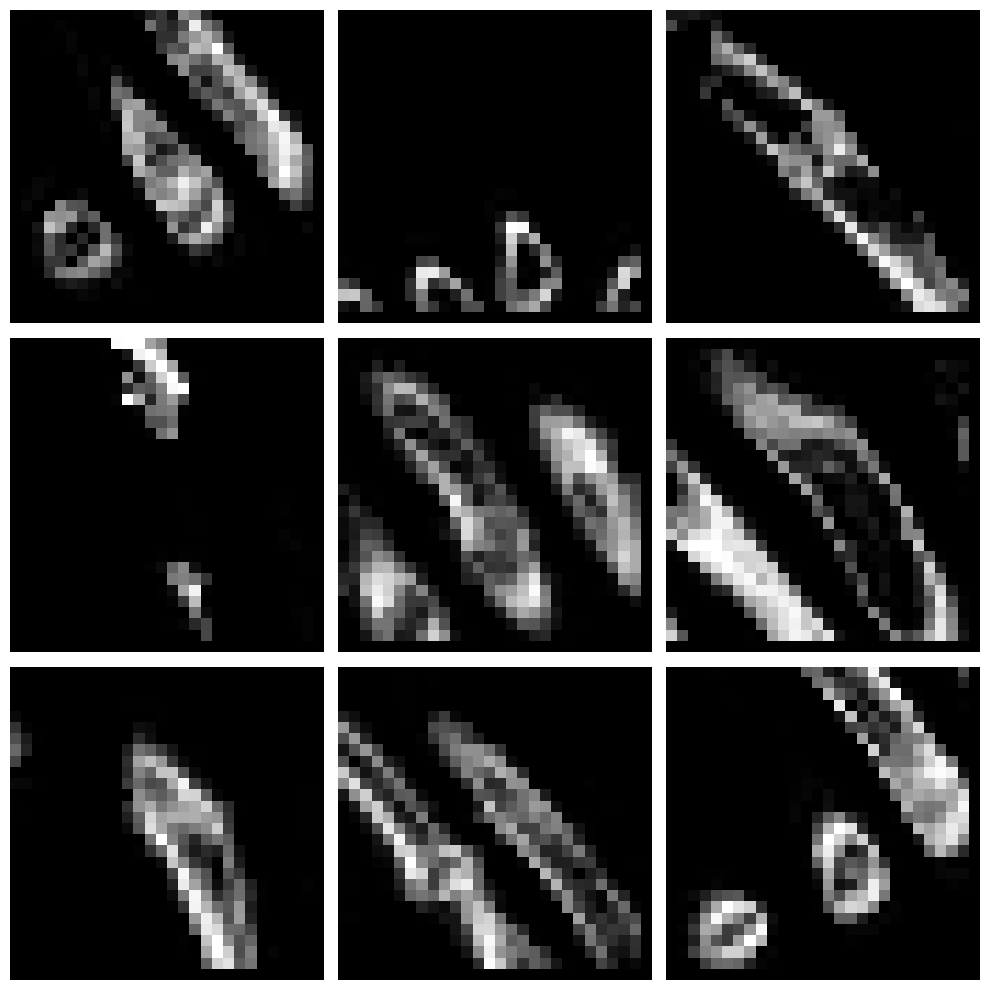

In [5]:
import matplotlib.pyplot as plt

def show_image(image, slice_index=14, cmap_type='gray'):
    """Display a slice from a 3D image safely."""
    if slice_index >= image.shape[0]:
        slice_index = image.shape[0] // 2  # Use center slice if index is too large
    plt.imshow(image[slice_index, :, :], cmap=cmap_type)
    plt.axis('off')
    plt.show()

# Displaying the first 9 training images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
sample = train_images[:9]

for img, ax in zip(sample, axes.flatten()):
    ax.imshow(img[14, :, :], cmap='gray')  # Show the middle slice
    ax.axis('off')

plt.tight_layout()
plt.show()


In [6]:
from tensorflow.keras.utils import to_categorical

train_images = train_images.reshape(-1, 28, 28, 28, 1)
val_images = val_images.reshape(-1, 28, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 28, 1)

# Normalizing the images
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encoding [3 classes]
train_labels = to_categorical(train_labels, num_classes=3)
val_labels = to_categorical(val_labels, num_classes=3)
test_labels = to_categorical(test_labels, num_classes=3)

# printing the shapes 
print(f'Training data shape: {train_images.shape}, Labels shape: {train_labels.shape}')
print(f'Validation data shape: {val_images.shape}, Labels shape: {val_labels.shape}')
print(f'Test data shape: {test_images.shape}, Labels shape: {test_labels.shape}')


Training data shape: (1027, 28, 28, 28, 1), Labels shape: (1027, 3)
Validation data shape: (103, 28, 28, 28, 1), Labels shape: (103, 3)
Test data shape: (240, 28, 28, 28, 1), Labels shape: (240, 3)


**Model Architecture**

1. The input shape is (28,28, 28,1), which means that the input image has a depth of 28 pixels along with its height and width of 28 pixels, and a depth of 1 channel (grayscale), representing a 3D input structure.

2. This model uses a convolutional neural network (CNN) architecture with size 3, stride 1 and padding 'same'. It consists of 3 convolutional layers, each followed by a 'Batch Normalization' layer and a 'Max Pooling' layer.

3. The output from the convolutional layers is flattened and then fed into two fully connected layers, each with a ReLU activation function. The first dense layer consists of 128 neurons, followed by a dropout of 0.5, and the second contains 64 neurons with dropout rate = 0.5

4. The output layer consists of 3 neurons which uses a softmax activation function to produce the output probabilities.

5. The model uses the Adam optimizer and categorical cross-entropy loss function to train, and accuracy is used as the evaluation metric.

6. Model is fitted on the trained data with 150 epochs and batch size 16 and validation and trained data accuracy and loss is compared to see that model is not overfitting

**Hyper-parameters Used**

							
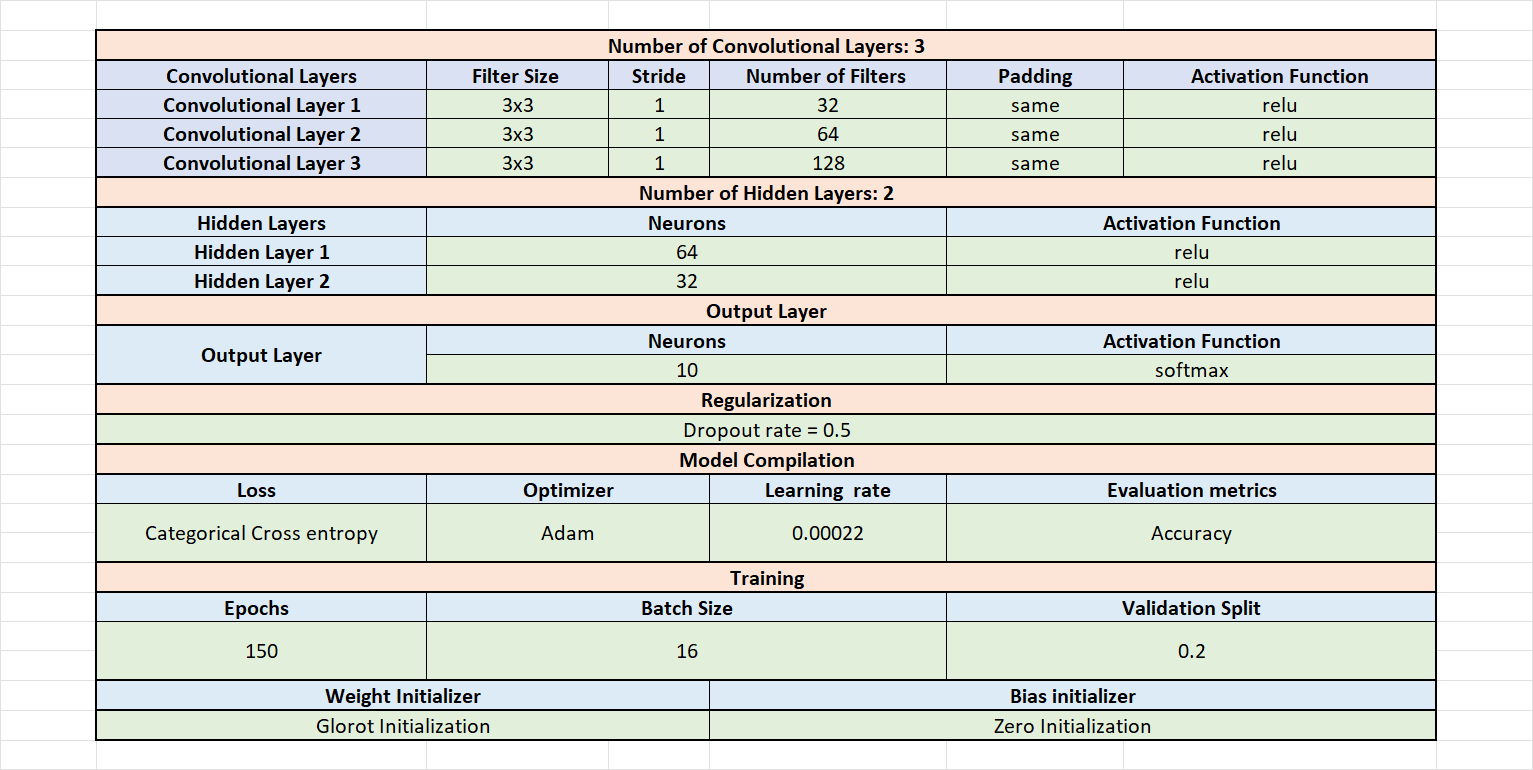

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt

# building the CNN Model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv3D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(28, 28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=2, padding='same'))

# 2nd Convolutional Layer
model.add(Conv3D(64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=2, padding='same'))

# 3rd Convolutional Layer
model.add(Conv3D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=2, padding='same'))

model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Fully Connected Layer 2
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00022), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# computing the class weights
train_labels_int = np.argmax(train_labels, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels_int), y=train_labels_int)
class_weight_dict = {i: min(class_weights[i], 1.5) for i in range(len(class_weights))}
print("Updated Class Weights:", class_weight_dict)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=9, factor=0.5, verbose=1)

# training the model 
history = model.fit(train_images, train_labels,
                    epochs=150, batch_size=16,  
                    validation_data=(val_images, val_labels),
                    class_weight=class_weight_dict,  
                    callbacks=[early_stopping, lr_scheduler])

# model accuracy calculation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc * 100:.4f}%")


Updated Class Weights: {0: 0.7237491190979564, 1: 0.8938207136640557, 2: 1.5}


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-21 04:23:45.967771: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - accuracy: 0.3728 - loss: 5.3534 - val_accuracy: 0.3883 - val_loss: 4.4256 - learning_rate: 2.2000e-04
Epoch 2/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.3790 - loss: 4.2507 - val_accuracy: 0.3883 - val_loss: 4.3341 - learning_rate: 2.2000e-04
Epoch 3/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.4029 - loss: 3.9302 - val_accuracy: 0.3883 - val_loss: 4.0560 - learning_rate: 2.2000e-04
Epoch 4/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.4085 - loss: 3.7217 - val_accuracy: 0.3398 - val_loss: 3.6572 - learning_rate: 2.2000e-04
Epoch 5/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 159ms/step - accuracy: 0.4078 - loss: 3.5111 - val_accuracy: 0.3010 - val_loss: 3.5506 - learning_rate: 2.2000e-04
Epoch 6/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 162ms/step - accuracy: 0.4506 - loss: 3.2925 - val_accuracy: 0.2136 - val_loss: 3.3898 - learning_rate: 2.2000e-04
Epoch 7/150
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/ste

In [8]:
# model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 28, 28, 28, 32) │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 28, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 14, 14, 14, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 14, 14, 14, 64) │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 14, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 7, 7, 7, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 7, 7, 7, 128)   │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 7, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 4, 4, 4, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,005,963 (15.28 MB)

 Trainable params: 1,335,171 (5.09 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2,670,344 (10.19 MB)

1) This model has a total of 4,005,963 parameters out of which 1,335,171 are trainable parameters and Non-trainable parameters are 448 .
2) **Convolutional Layers:** The model uses 32, 64, and 128 filters of size 3x3, each followed by ReLU activation.
3) **Batch Normalization and Max Pooling:** Batch Normalization is applied after each convolution. Also max pooling of size 2 is used.
4) **Dense Layers:** Two layers with dropout rate = 0.5 is applied for generalization.
5) **Output Layer:** The output layer has softmax activation for categorization based learned features.

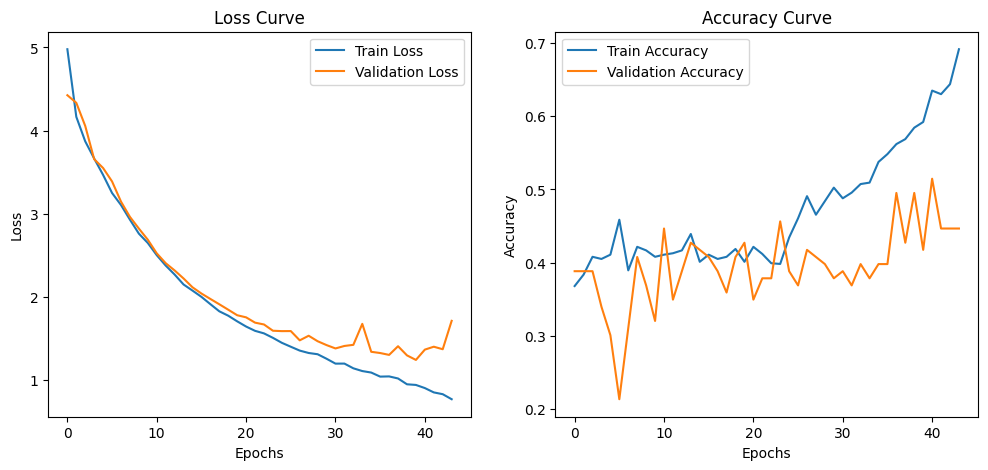

In [9]:
# Plotting the learning curves
plt.figure(figsize=(12, 5))

# Loss 
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()


In [10]:
# predicting the probabilities for each class
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# dictionary to match numbers with those with the fracture types
fracture_dict = {
    0: "Buckle",
    1: "Nondisplaced",
    2: "Displaced"
}

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [11]:
actual_labels = [fracture_dict[label] for label in np.argmax(test_labels, axis=1)]
predicted_labels = [fracture_dict[label] for label in predicted_classes]

# identifying correct predictions
correct_indices = np.where(predicted_classes == np.argmax(test_labels, axis=1))[0]
print("Found {} correct labels out of {}".format(len(correct_indices), len(test_labels)))


Found 125 correct labels out of 240


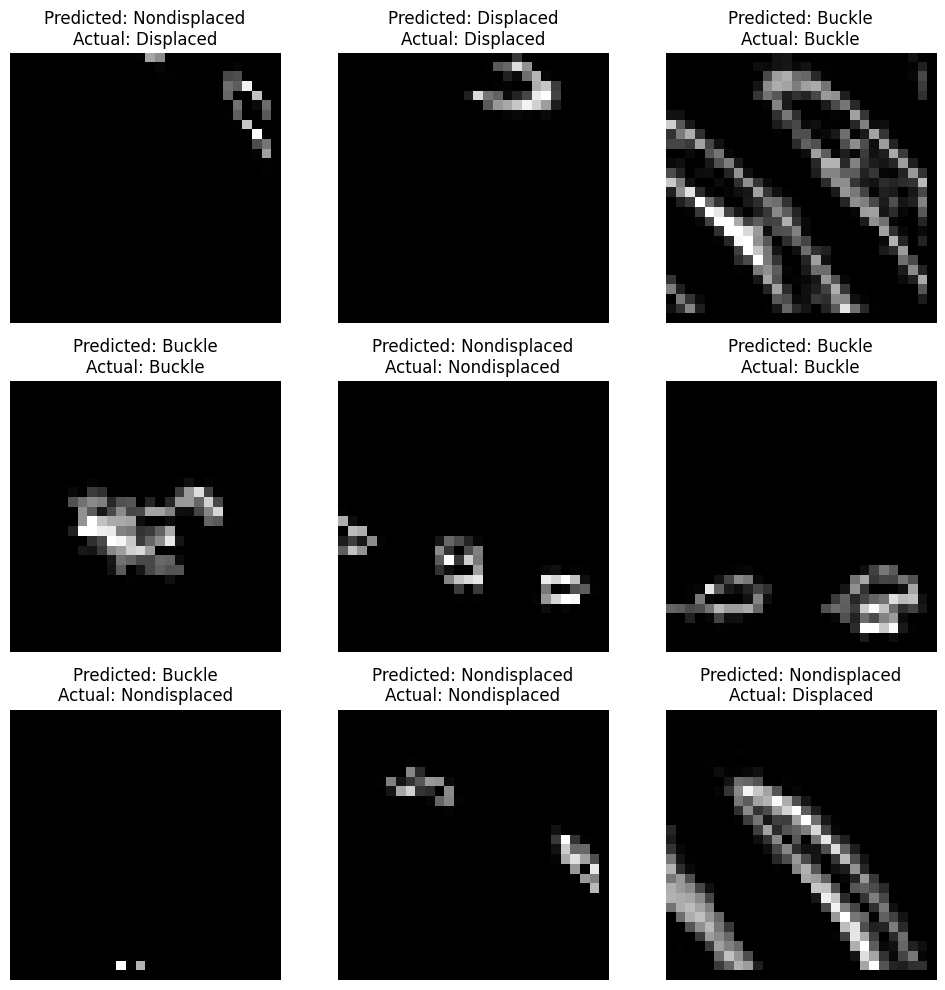

In [12]:
def show_image(image, slice_index=14, cmap_type='gray'):
    """Display a middle slice from a 3D image."""
    if image.ndim > 3:
        image = image[slice_index, :, :, 0]  
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')

# Displaying first 9 predicted and actual values
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    show_image(test_images[i])
    plt.title("Predicted: {}\nActual: {}".format(predicted_labels[i], actual_labels[i]))
plt.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

test_Y_true = np.argmax(test_labels, axis=1)

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# confusion matrix
cm = confusion_matrix(test_Y_true, predicted_classes)
print("Confusion Matrix:")
print(cm)



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Confusion Matrix:
[[55 29  6]
 [29 62 13]
 [12 26  8]]


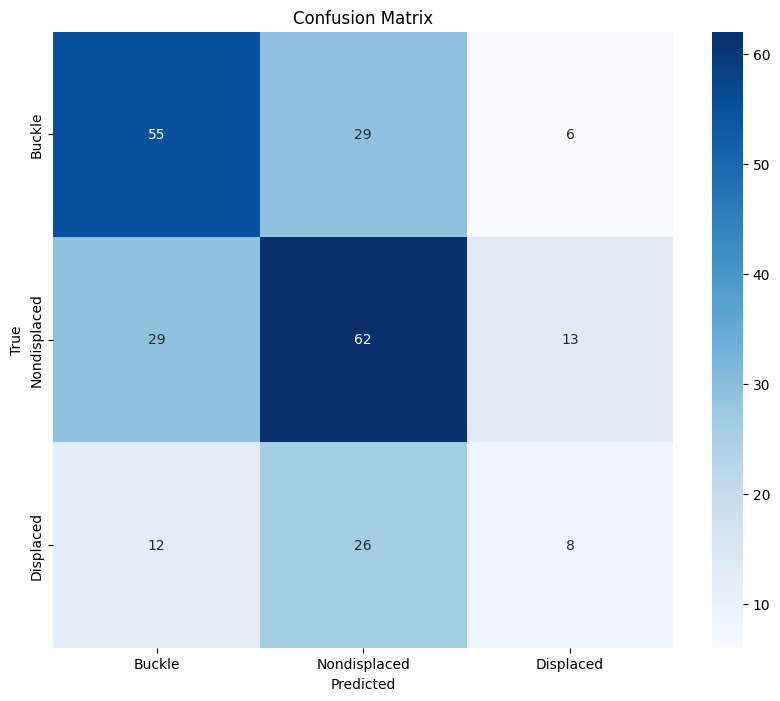

In [14]:
# displaying the confusion matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Buckle', 'Nondisplaced', 'Displaced'], yticklabels=['Buckle', 'Nondisplaced', 'Displaced'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Performance Scores

precision = precision_score(test_Y_true, predicted_classes, average='weighted')
recall = recall_score(test_Y_true, predicted_classes, average='weighted')
f1 = f1_score(test_Y_true, predicted_classes, average='weighted')

print("Precision Score is:", precision)
print("Recall Score is:", recall)
print("F1 Score is:", f1)

Precision Score is: 0.5012635030864198
Recall Score is: 0.5208333333333334
F1 Score is: 0.5069205808704392


In [16]:
print(f"Test Accuracy: {test_acc * 100:.4f}%")


Test Accuracy: 52.0833%
